<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 04 - Data analyzing
</div>

**Import necesary libraries**

In [216]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read from csv**

In [217]:
df = pd.read_csv("Data/survey.csv")

'Are you self-employed?',
'How many employees does your company or organization have?',
'Is your employer primarily a tech company/organization?',
'Is your primary role within your company related to tech/IT?',
'Does your employer provide mental health benefits as part of healthcare coverage?',
'Do you know the options for mental health care available under your employer-provided coverage?',
'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
'Do you think that discussing a physical health issue with your employer would have negative consequences?',
'Would you feel comfortable discussing a mental health disorder with your coworkers?',
'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
'Do you feel that your employer takes mental health as seriously as physical health?',
'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
'Do you know local or online resources to seek help for a mental health disorder?',
'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
'Do you believe your productivity is ever affected by a mental health issue?',
'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
'Do you have previous employers?',
'Have your previous employers provided mental health benefits?',
'Were you aware of the options for mental health care provided by your previous employers?',
'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
'Would you have been willing to discuss a mental health issue with your previous co-workers?',
'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
'Did you feel that your previous employers took mental health as seriously as physical health?',
'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?',
'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
'Why or why not?',
'Would you bring up a mental health issue with a potential employer in an interview?',
'Why or why not?.1',
'Do you feel that being identified as a person with a mental health issue would hurt your career?',
'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?',
'How willing would you be to share with friends and family that you have a mental illness?',
'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?',
'Do you have a family history of mental illness?',
'Have you had a mental health disorder in the past?',
'Do you currently have a mental health disorder?',
'If yes, what condition(s) have you been diagnosed with?',
'If maybe, what condition(s) do you believe you have?',
'Have you been diagnosed with a mental health condition by a medical professional?',
'If so, what condition(s) were you diagnosed with?',
'Have you ever sought treatment for a mental health issue from a mental health professional?',
'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
'What is your age?', 'What is your gender?',
'What country do you live in?',
'What US state or territory do you live in?',
'What country do you work in?',
'What US state or territory do you work in?',
'Which of the following best describes your work position?',
'Do you work remotely?'

In [218]:
df = pd.read_csv("Data/processed_data.csv")
df.sample(10)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag
7,0,>1000,1.0,Yes,Yes,No,Yes,Yes,Very easy,No,...,Yes,1,Sometimes,Often,37,Female,United States of America,United States of America,Dev Evangelist/Advocate|Back-end Developer,Always
936,0,500-1000,1.0,No,NaN,I don't know,No,I don't know,Somewhat easy,No,...,No,0,Not applicable to me,Not applicable to me,30,Male,Italy,Italy,Back-end Developer,Never
98,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,0,Not applicable to me,Not applicable to me,39,Male,Netherlands,Netherlands,One-person shop|Back-end Developer|Sales|Suppo...,Sometimes
237,0,100-500,1.0,No,No,No,I don't know,I don't know,Very easy,Maybe,...,No,0,Not applicable to me,Not applicable to me,31,Male,Russia,Russia,Front-end Developer|Back-end Developer,Never
934,0,6-25,1.0,Not eligible for coverage / N/A,I am not sure,No,I don't know,I don't know,Somewhat difficult,Maybe,...,No,0,Not applicable to me,Not applicable to me,26,Male,United Kingdom,United Kingdom,Back-end Developer,Always
346,0,>1000,1.0,No,No,No,No,No,Somewhat easy,Maybe,...,No,0,Not applicable to me,Not applicable to me,23,Male,Italy,Italy,Front-end Developer|Back-end Developer|DevOps/...,Never
1152,0,26-100,1.0,I don't know,No,No,No,I don't know,Very easy,No,...,No,0,Not applicable to me,Not applicable to me,29,Male,United States of America,United States of America,DevOps/SysAdmin|Support|Back-end Developer,Sometimes
745,0,>1000,1.0,Yes,I am not sure,No,Yes,Yes,Very easy,No,...,No,1,Never,Sometimes,63,Male,United States of America,United States of America,Back-end Developer,Sometimes
1009,0,100-500,1.0,No,I am not sure,No,No,I don't know,Neither easy nor difficult,Maybe,...,No,0,Rarely,Sometimes,32,Female,United States of America,United States of America,Front-end Developer,Never
638,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Yes,1,Sometimes,Not applicable to me,32,Male,United States of America,United States of America,Executive Leadership,Sometimes


# **Đọc dữ liệu đã được xử lý**

Chúng ta sẽ tiến hành đọc dữ liệu đã xử lý và được sao lưu trong `./Data/processed_data.csv`. Dữ liệu này được đọc và lưu trong biến `df_`.

In [219]:
df_ = pd.read_csv('Data/processed_data.csv')
df_.sample(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag
383,0,26-100,1.0,Yes,Yes,Yes,Yes,Yes,Very easy,No,...,Yes,1,Sometimes,Often,32,Male,United States of America,United States of America,Dev Evangelist/Advocate,Sometimes
1263,0,6-25,1.0,No,No,No,No,I don't know,Very easy,No,...,No,0,Not applicable to me,Not applicable to me,24,Male,United States of America,United States of America,Dev Evangelist/Advocate|DevOps/SysAdmin|Design...,Sometimes
469,0,>1000,0.0,Yes,Yes,Yes,Yes,I don't know,Somewhat easy,No,...,Yes,1,Sometimes,Often,35,Male,United States of America,United States of America,Supervisor/Team Lead|Back-end Developer|Front-...,Sometimes
1045,0,100-500,1.0,No,NaN,No,No,I don't know,Very difficult,Maybe,...,No,0,Not applicable to me,Not applicable to me,43,Male,Sweden,Sweden,Back-end Developer,Never
680,0,6-25,1.0,Yes,Yes,No,No,Yes,Somewhat difficult,Yes,...,Yes,1,Sometimes,Often,36,Female,United States of America,United States of America,Other,Never


- Ở phân tích này, ta chỉ quan tâm đến những câu trả lời khảo sát mà ví trị công việc thuộc lĩnh vực CNTT.

In [220]:
tech_list = []
techs = ['Back-end', 'Front-end', 'Dev', 'DevOps']
for tech in techs:
    tech_list.append(df_[df_['work_position'].str.contains(tech)]['work_position'].tolist())
    
# remove duplicate keys in the list
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

# drop rows that are not in the list
df_ = df_[df_['work_position'].isin(flat_list)]

# **Analyzing**

## **_Câu hỏi số 01_**
**Nhân viên làm việc trong lĩnh vực Công nghệ thông tin ở khu vực nào cảm thấy quan ngại chia sẻ sức khỏe tâm thần với mọi người trong cùng môi trường làm việc nhất?**

- Trả lời câu hỏi này giúp các chuyên gia sức khỏe hiểu được tâm lý người lao động về việc chia sẻ bệnh lý trong môi trường làm việc của họ. Từ đó có thể phát hiện sớm các lý do và đưa ra giải pháp kịp thời đảm bảo quyền lợi người lao động.
- Để trả lời câu hỏi này, chúng ta cần phải phân chia dữ liệu khảo sát người lao động lao động giữa các khu vực `country_work` thông qua các `mh_discussion_neg_impact`, `ph_discussion_neg_impact`, `mh_discussion_cowork`, `mh_discussion_supervisor`.

### Xử lý dữ liệu

- Chọn các đặc trưng cần thiết.

In [221]:
analyz1_df = df_.copy()[['mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork', 'mh_discussion_supervisor', 'country_work']]

- Phân chia các nơi làm việc của người lao động theo các châu lục.
    + Để làm việc này, đầu tiên chúng ta cần xem giá trị `unique` của đặc trưng `country_work`.

In [222]:
print(analyz1_df['country_work'].unique())

['United Kingdom' 'United States of America' 'Canada' 'Germany'
 'Netherlands' 'Czech Republic' 'Lithuania' 'France' 'Venezuela' 'Poland'
 'Brazil' 'Denmark' 'Belgium' 'Sweden' 'Russia' 'Spain'
 'United Arab Emirates' 'Mexico' 'Australia' 'Switzerland' 'India'
 'Ireland' 'Italy' 'Finland' 'Colombia' 'Costa Rica' 'Vietnam' 'Bulgaria'
 'South Africa' 'Slovakia' 'Austria' 'Bangladesh' 'Norway' 'Greece'
 'Other' 'New Zealand' 'Iran' 'Israel' 'Japan' 'Ecuador' 'Romania'
 'Bosnia and Herzegovina' 'Chile' 'Guatemala' 'Serbia' 'Estonia']


- Phân chia các nơi làm việc của người lao động theo các châu lục.
    + Tiếp theo, chúng ta sẽ điền các châu lục tương ứng của từng quốc gia.

In [223]:
areas = ['Europe', 'North America', 'North America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'South America', 'Europe', 'South America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'North America', 'Oceania', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'South America', 'North America', 'Asia', 'Europe', 'Africa', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Unknown', 'Oceania', 'Asia', 'Asia', 'Asia', 'South America', 'Europe', 'Europe', 'South America', 'North America', 'Europe', 'Europe']
countries = df_['country_work'].unique()

# Create a dictionary with areas as keys and countries as values
replace_dict = pd.DataFrame({'country': countries, 'area': areas}).set_index('country').to_dict()

# Match the country with the area
analyz1_df['area'] = analyz1_df['country_work'].map(replace_dict['area'])

analyz1_df.sample(5)

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor,country_work,area
1200,Maybe,Maybe,Maybe,No,United States of America,North America
77,No,No,Yes,Maybe,Netherlands,Europe
116,No,No,Maybe,Yes,United States of America,North America
1405,Maybe,No,No,No,Poland,Europe
1395,Yes,No,Maybe,No,United States of America,North America


- Xóa bỏ những dữ liệu không cần thiết.
    + Bởi vì trong đặc trưng `country_work` chứa tên các quốc gia không tồn tại và số lượng này khá ít nên chúng ta sẽ không khảo sát những dòng dữ liệu này.
    + Những dòng bị thiếu giá trị (missing value) là những khảo sát của chủ doanh nghiệp. Ở câu hỏi này, chúng tôi đang quan tâm đến sự e ngại của nhân viên/người lao động trong môi trường làm việc để có thể phát hiện sớm và hỗ trợ phúc lợi kịp thời. Vì vậy, những dòng dữ liệu thiếu này nếu điền giá trị dựa trên một cơ sở nào đó thì nó vẫn không đúng với mục đích câu hỏi. Chúng ta sẽ xóa những dòng dữ liệu này.

In [224]:
# Remove rows with 'Unknown' area
analyz1_df = analyz1_df[analyz1_df['area'] != 'Unknown']

# Delete rows with missing values
analyz1_df = analyz1_df.dropna()

# Statistics number of employees in each area
number_each_area = analyz1_df['area'].value_counts(sort=False)
print('Number of employees in each area:\n', number_each_area)

# Statistics number of missing values in each column
print('\nNumber of missing values in each column:\n', analyz1_df.isnull().sum())

Number of employees in each area:
 area
Europe           235
North America    581
South America     12
Asia              13
Oceania           20
Africa             4
Name: count, dtype: int64

Number of missing values in each column:
 mh_discussion_neg_impact    0
ph_discussion_neg_impact    0
mh_discussion_cowork        0
mh_discussion_supervisor    0
country_work                0
area                        0
dtype: int64


- Loại bỏ cột `country_work` sau khi đã thay thế bằng châu lục.

In [225]:
# Drop `country_work` column and sort by `area`
analyz1_df = analyz1_df.drop('country_work', axis=1).sort_values('area')
analyz1_df.sample(5)

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor,area
305,Maybe,No,Maybe,Maybe,North America
569,No,No,Maybe,Yes,North America
411,Maybe,No,Maybe,Yes,North America
935,No,No,Maybe,Yes,North America
951,No,No,Yes,Yes,North America


### Tính toán và xử lý số liệu

- Xem các giá trị unique của từng cột được nhóm theo châu lục.

In [226]:
def value_counts_groupby(col, df: pd.DataFrame=analyz1_df):
    if col.name == 'area':
        return pd.Series([np.NaN]*len(df['area'].unique()), index=df['area'].unique())
    name_feature = col.name
    temp = df[[name_feature, 'area']]
    temp = temp.groupby(['area']).agg({name_feature: lambda x: x.value_counts().to_dict()})
    return pd.Series(temp[name_feature], index=temp.index)

anal1_profile = analyz1_df.apply(lambda col: value_counts_groupby(col)).drop('area', axis=1)
anal1_profile

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor
Africa,"{'No': 2, 'Yes': 2}","{'No': 2, 'Maybe': 2}","{'No': 3, 'Yes': 1}","{'Yes': 2, 'No': 2}"
Asia,"{'Maybe': 6, 'No': 4, 'Yes': 3}","{'No': 7, 'Maybe': 6}","{'No': 7, 'Maybe': 3, 'Yes': 3}","{'Yes': 5, 'No': 5, 'Maybe': 3}"
Europe,"{'No': 99, 'Maybe': 93, 'Yes': 43}","{'No': 181, 'Maybe': 47, 'Yes': 7}","{'Maybe': 97, 'No': 74, 'Yes': 64}","{'Maybe': 85, 'Yes': 84, 'No': 66}"
North America,"{'Maybe': 257, 'No': 217, 'Yes': 107}","{'No': 423, 'Maybe': 137, 'Yes': 21}","{'Maybe': 250, 'No': 201, 'Yes': 130}","{'Yes': 215, 'Maybe': 204, 'No': 162}"
Oceania,"{'No': 8, 'Maybe': 7, 'Yes': 5}","{'No': 14, 'Maybe': 5, 'Yes': 1}","{'Maybe': 9, 'No': 6, 'Yes': 5}","{'Yes': 10, 'Maybe': 8, 'No': 2}"
South America,"{'Yes': 5, 'Maybe': 4, 'No': 3}","{'No': 9, 'Maybe': 2, 'Yes': 1}","{'No': 7, 'Maybe': 3, 'Yes': 2}","{'No': 6, 'Yes': 5, 'Maybe': 1}"


- Từ bảng trên, lưu trữ `dataframe` tổng số lượng câu trả lời mỗi `dict` và `dataframe` chứa `dict` câu trả lời `Yes` và `Maybe`.

In [227]:
# Store ratio 'Yes' and 'Maybe' answer in a new dataframe
anal1_ratio = anal1_profile.apply(lambda col: col.apply(lambda dict: 1-dict['No']/sum(dict.values())))*100
anal1_ratio

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor
Africa,50.000000,50.000000,25.000000,50.000000
Asia,69.230769,46.153846,46.153846,61.538462
Europe,57.872340,22.978723,68.510638,71.914894
North America,62.650602,27.194492,65.404475,72.117040
Oceania,60.000000,30.000000,70.000000,90.000000
South America,75.000000,25.000000,41.666667,50.000000


### Trực quan hóa

- Số lượng người tham gia khảo sát ở từng châu lục

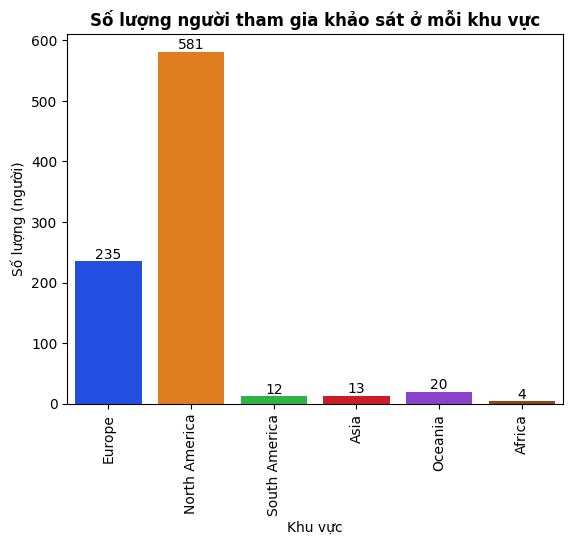

In [228]:
# Visualize the number of employees in each area
ax = sns.barplot(x=number_each_area.index, y=number_each_area.values, palette='bright')
ax.bar_label(ax.containers[0])
ax.set_title('Số lượng người tham gia khảo sát ở mỗi khu vực', fontdict={'weight': 'bold', 'size': 12})
plt.xlabel('Khu vực')
plt.ylabel('Số lượng (người)')
plt.xticks(rotation=90)
plt.show()

- Trực quan sự quan ngại của người tham gia khảo sát.

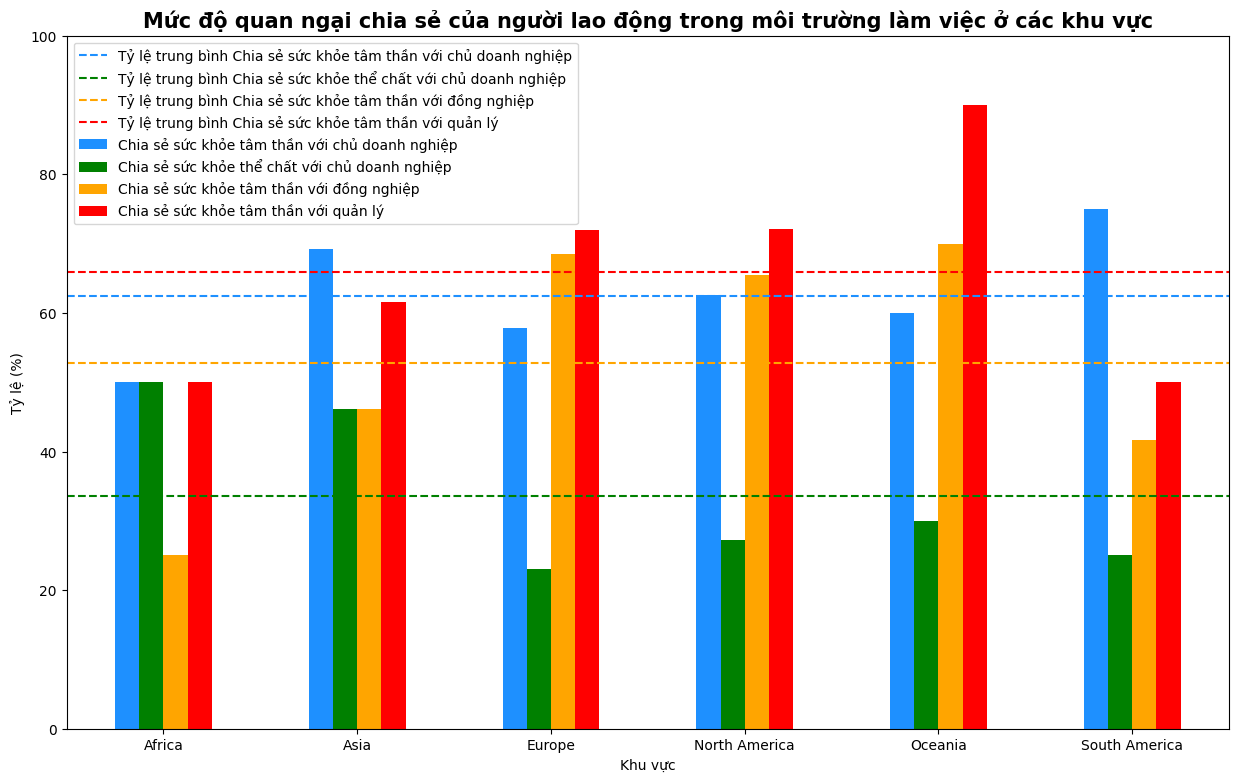

In [229]:
anal1_plot = anal1_ratio.reset_index(names='area')
anal1_plot.columns = ['Khu vực', 'Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý']

color_ = ['dodgerblue', 'green', 'orange', 'red']
color_dict = pd.Series(color_, index=anal1_plot.columns[1:]).to_dict()

anal1_plot.plot(x='Khu vực',
                y=['Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý'],
                kind='bar', figsize=(15, 9), color=color_,
                ylabel='Tỷ lệ (%)', ylim=(0, 100),
                xlabel='Khu vực');

# Thêm đường ngang là giá trị trung bình của mỗi feature
for feature in anal1_plot.columns[1:]:
    mean = anal1_plot[feature].mean()
    plt.axhline(mean, linestyle='--', color=color_dict[feature], label=f'Tỷ lệ trung bình {feature}')
plt.legend();
plt.xticks(rotation = 0);
plt.title('Mức độ quan ngại chia sẻ của người lao động trong môi trường làm việc ở các khu vực', fontdict={'size': 15, 'weight': 'bold'});

**_Đánh giá chung:_**
- **Tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần và sức khỏe thể chất đều khá cao ở tất cả các châu lục, với mức trung bình trên $50\%$.** Điều này cho thấy rằng việc chia sẻ thông tin về sức khỏe tâm thần và sức khỏe thể chất tại nơi làm việc vẫn còn là một vấn đề đáng lo ngại.
- **Có sự khác biệt đáng kể về tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần và sức khỏe thể chất giữa các châu lục.** Cụ thể, châu Phi có tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần thấp nhất ($20\%$ - $50\%$), trong khi châu Úc có tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần cao nhất ($30\%$ - $90\%$).
- **Tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần cao hơn tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe thể chất ở tất cả các châu lục.** Điều này cho thấy rằng sức khỏe tâm thần vẫn còn là một vấn đề nhạy cảm hơn sức khỏe thể chất tại nơi làm việc.
- **Tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần với chủ doanh nghiệp hay người quản lý cao hơn nhiều so với đồng nghiệp.** Điều này cho thấy còn tồn tại nhiều lý do khiến người lao động bị rào cản chia sẻ vấn đề sức khỏe của họ. Nó đang làm cho người lao động không được hưởng quyền lợi chính đáng của họ.

## **_Câu hỏi số 02_**
**Tỷ lệ người tham gia khảo sát mà họ nghĩ rằng có thể hoặc đang gặp vấn đề về sức khỏe tâm thần hiện nay như thế nào?**

- Trả lời câu hỏi này giúp các chuyên gia sức khỏe có cái nhìn tổng quan về lao động làm việc trên toàn cầu, phát hiện và tìm hiểu sớm lý do để đưa ra giải pháp đảm bảo quyền lợi người lao động.
- Để trả lời câu hỏi này, chúng ta dựa trên `mh_disorder_current` và khảo sát thông qua các `age`, `sex`, `country_work` và `remote_flag`.

### Xử lý dữ liệu

- Chọn các đặc trưng cần thiết.

In [230]:
anal2_df = df_.copy()[['mh_disorder_current', 'age', 'sex', 'country_work', 'remote_flag']]
anal2_df.sample(5)

,mh_disorder_current,age,sex,country_work,remote_flag
1297,Maybe,37,Male,Germany,Sometimes
653,No,26,Female,Canada,Sometimes
454,Yes,24,Female,United States of America,Sometimes
502,Maybe,23,Other,United States of America,Sometimes
606,Maybe,32,Female,United States of America,Always


- Xử lý giá trị bị thiếu trong dữ liệu.

In [231]:
# Statistics number of missing values in each column
print('Number of missing values in each column:\n', anal2_df.isnull().sum())

# Because the number of missing values is small, we can drop the rows with missing values
anal2_df = anal2_df.dropna()

# Statistics number of missing values in each column
print('\nNumber of missing values in each column after dropping rows:\n', anal2_df.isnull().sum())

Number of missing values in each column:
 mh_disorder_current    0
age                    0
sex                    2
country_work           0
remote_flag            0
dtype: int64

Number of missing values in each column after dropping rows:
 mh_disorder_current    0
age                    0
sex                    0
country_work           0
remote_flag            0
dtype: int64


- Phân chia các nơi làm việc của người lao động theo các châu lục.

In [232]:
areas = ['Europe', 'America', 'America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'America', 'Europe', 'America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'America', 'Oceania', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'America', 'America', 'Asia', 'Europe', 'Africa', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Unknown', 'Oceania', 'Asia', 'Asia', 'Asia', 'America', 'Europe', 'Europe', 'America', 'America', 'Europe', 'Europe']
countries = df_['country_work'].unique()

# Create a dictionary with areas as keys and countries as values
replace_dict = pd.DataFrame({'country': countries, 'area': areas}).set_index('country').to_dict()

# Match the country with the area
anal2_df['country_work'] = anal2_df['country_work'].map(replace_dict['area'])

# Drop the rows that are 'Unknown' in the 'country_work' column
anal2_df = anal2_df[anal2_df['country_work'] != 'Unknown']

anal2_df.head(10)

,mh_disorder_current,age,sex,country_work,remote_flag
0,No,39,Male,Europe,Sometimes
1,Yes,29,Male,America,Never
2,No,38,Male,Europe,Always
4,Yes,43,Female,America,Sometimes
5,Yes,42,Male,Europe,Sometimes
6,No,30,Male,America,Sometimes
7,Yes,37,Female,America,Always
8,Yes,44,Female,America,Sometimes
9,Yes,30,Male,America,Always
10,Yes,28,Male,America,Never


- Chia độ tuổi người tham gia khảo sát thành 3 khoảng độ tuổi $\leq30$, $(30;60]$ và $>60$.

In [233]:
# Divied age column into three age groups (<30, 30-60, >60)
anal2_df['age'] = pd.cut(anal2_df['age'], bins=[0, 30, 60, 100], labels=['≤ 30', '31 - 60', '> 60'])

anal2_df.head(10)

,mh_disorder_current,age,sex,country_work,remote_flag
0,No,31 - 60,Male,Europe,Sometimes
1,Yes,≤ 30,Male,America,Never
2,No,31 - 60,Male,Europe,Always
4,Yes,31 - 60,Female,America,Sometimes
5,Yes,31 - 60,Male,Europe,Sometimes
6,No,≤ 30,Male,America,Sometimes
7,Yes,31 - 60,Female,America,Always
8,Yes,31 - 60,Female,America,Sometimes
9,Yes,≤ 30,Male,America,Always
10,Yes,≤ 30,Male,America,Never


- Lưu trữ thông tin thống kê của các đặc trưng thành những `pd.Dataframe` riêng biệt

In [234]:
area_df = anal2_df[['mh_disorder_current', 'country_work']].groupby('country_work').value_counts().unstack().fillna(0)
area_df.columns.name = None
age_df = anal2_df[['mh_disorder_current', 'age']].groupby('age').value_counts().unstack().fillna(0)
age_df.columns.name = None
gender_df = anal2_df[['mh_disorder_current', 'sex']].groupby('sex').value_counts().unstack().fillna(0)
gender_df.columns.name = None
remoteness_df = anal2_df[['mh_disorder_current', 'remote_flag']].groupby('remote_flag').value_counts().unstack().fillna(0)
remoteness_df.columns.name = None

In [235]:
age_df.head()

,Maybe,No,Yes
age,,,
≤ 30,113,150,174
31 - 60,149,219,228
> 60,0,2,7


In [236]:
gender_df.head()

,Maybe,No,Yes
sex,,,
Female,34.0,53.0,121.0
Male,220.0,318.0,275.0
Other,8.0,0.0,13.0


In [237]:
remoteness_df.head()

,Maybe,No,Yes
remote_flag,,,
Always,68,83,95
Never,72,87,88
Sometimes,122,201,226


In [238]:
area_df.head()

,Maybe,No,Yes
country_work,,,
Africa,1.0,3.0,0.0
America,169.0,213.0,300.0
Asia,3.0,7.0,4.0
Europe,86.0,139.0,92.0
Oceania,3.0,9.0,13.0


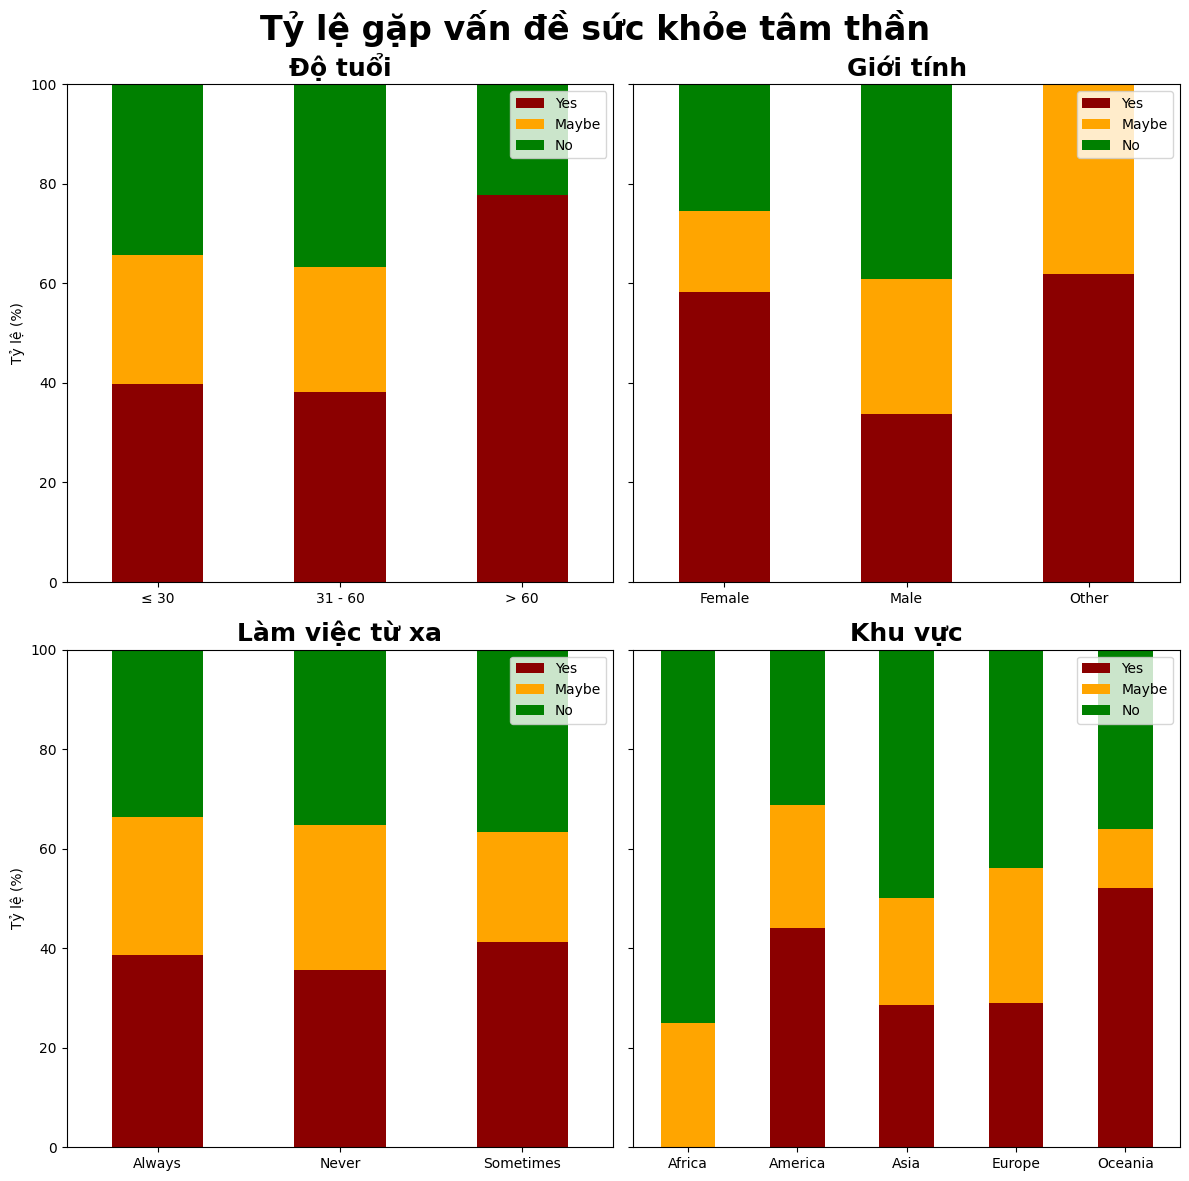

In [239]:
# Convert to percentage
age_perc = (age_df.div(age_df.sum(axis=1), axis=0) * 100).reset_index()
gender_perc = (gender_df.div(gender_df.sum(axis=1), axis=0) * 100).reset_index()
remoteness_perc = (remoteness_df.div(remoteness_df.sum(axis=1), axis=0) * 100).reset_index()
area_perc = (area_df.div(area_df.sum(axis=1), axis=0) * 100).reset_index()

color_ = ['darkred', 'orange', 'green']

# Plot 4 pie charts of age, gender, remote, area in a 2x2 grid
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey=True)
fig.suptitle('Tỷ lệ gặp vấn đề sức khỏe tâm thần', fontsize=24, fontweight='bold')

# Plot age_perc
age_perc.plot(x='age', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[0, 0], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[0, 0].set_title('Độ tuổi', fontdict={'weight': 'bold', 'size': 18});

# Plot gender_perc
gender_perc.plot(x='sex', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[0, 1], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[0, 1].set_title('Giới tính', fontdict={'weight': 'bold', 'size': 18});

# Plot remoteness_perc
remoteness_perc.plot(x='remote_flag', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[1, 0], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[1, 0].set_title('Làm việc từ xa', fontdict={'weight': 'bold', 'size': 18});

# Plot area_perc
area_perc.plot(x='country_work', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[1, 1], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[1, 1].set_title('Khu vực', fontdict={'weight': 'bold', 'size': 18});

fig.tight_layout()

**_Đánh giá chung:_**
- **Tỷ lệ người lao động cảm thấy hay đang có vấn đề tâm thần phân loại theo mọi khía cạnh đều mức trung bình khá cao, trên $50\%$.** Điều này cho thấy rằng người lao động có thể đang gặp nhiều tác nhân tiêu cực khiến họ cảm thấy hoặc đang gặp vấn đề về sức khỏe tâm thần.
- **Những người trên 60 tuổi đang có vấn đề về sức khỏe tâm thần khá cao**, cụ thể tỷ lệ này chiếm gần $80\%$ trong những người trên 60 tuổi tham gia khảo sát. Điều này cho thấy những người lao động lớn tuổi dễ bị ảnh hưởng tiêu cực khiến họ tổn thương về sức khỏe tâm thần.
- **Tỷ lệ những người thuộc cộng đồng LGBT cảm thấy bản thân đang gặp vấn đề sức khỏe tâm thần rất cao.** Cụ thể, khoảng $80\%$ người tham gia khảo sát họ cho rằng mình đang bị tổn thương về sức khỏe tâm thần, và $20\%$ còn lại cũng cho biết họ cảm thấy bản thân cũng đang có khả năng cao gặp vấn đề này. Đây là con số đáng báo động, cho thấy có nhiều lý do khiến những người thuộc LGBT gặp vấn đề sức khỏe tâm thần.
- **Dù người tham gia khảo sát đang làm việc từ xa hay trực tiếp tại công ty đều gặp phải vấn đề về sức khỏe tâm thần trên $50\%$.** Có thể thấy rằng với mỗi hình thức làm việc luôn có một số nguyên nhân khiến bản thân họ cảm thấy tiêu cực và tổn thương sức khỏe tâm thần.
- **Khu vực châu Mỹ là nơi có nhiều người cảm thấy và đang gặp vấn đề về sức khỏe tâm thần.** Điều đó cho thấy rằng châu Mỹ có môi trường làm việc khắc nghiệt hơn so với các châu lục còn lại, đễ khiến con người bị tổn thương sức khỏe tâm thần.